## 영상정보처리 10주차 과제 템플리트
- 마감: 11월 8일 11시 59분 PM
- 점수: 10점 만점
    
이름: 이상민         
학번: 32153180


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
%cd /gdrive/My\ Drive/ImageProcClass/Week10

image_path = '../Dongkeun-OpenCV-ImgData/leaf.png'
image_path_noised = '../Dongkeun-OpenCV-ImgData/leaf-noise.png'

/gdrive/My Drive/ImageProcClass/Week10


##문제 1
1. otsu's binarization에서 같이 사용하는 thresholding  방법론 THRESH_BINARY, THRESH_TRUC, THRESH_TOZERO 변경하여 사용 경우, 필터링으로 선작업을 하지 않은 결과에 어떤 영향을 미치는 지, 예시하는 프로그램과 결과를 간단하게 정리하시오. 

2. 또한 위의 분석을 가우시안 필러를 적용했을 때, 어떻게 변화하는 지 예시하는 프로그램과 결과를 간단하게 정리하시오. 

테스트 이미지는 위에서 주어진 image_path, image_path_noised 를 사용하시오. 







In [3]:
# library and function
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_with_matplotlib(img, title, pos):
  img_RGB = img[:, :, ::-1]
  ax = plt.subplot(3, 2, pos)
  plt.imshow(img_RGB)
  plt.title(title)
  plt.axis('off')

def show_hist_with_matplotlib_gray(hist, title, pos, color, t=-1):
  ax = plt.subplot(3, 2, pos)
  plt.title(title)
  plt.xlabel('bins')
  plt.ylabel('number of pixels')
  plt.xlim([0, 256])
  plt.axvline(x=t, color='m', linestyle='--')
  plt.plot(his, color=color)

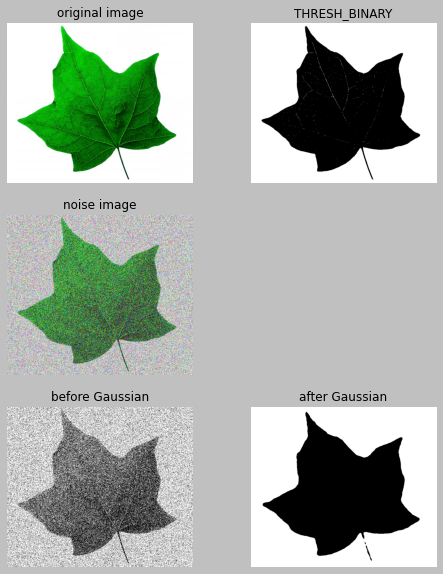

In [4]:
# THRESH_BINARY
img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noise_img = cv2.imread(image_path_noised)
noise_img_gray = cv2.cvtColor(noise_img, cv2.COLOR_BGR2GRAY)
blurred_img_gray = cv2.GaussianBlur(noise_img_gray, (25, 25), 0)

fig = plt.figure(figsize = (8, 10))
fig.patch.set_facecolor('silver')

ret, th = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret2, th2 = cv2.threshold(noise_img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret3, th3 = cv2.threshold(blurred_img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_with_matplotlib(img, 'original image', 1)
show_with_matplotlib(noise_img, 'noise image', 3)
show_with_matplotlib(cv2.cvtColor(th, cv2.COLOR_GRAY2BGR), 'THRESH_BINARY', 2)
show_with_matplotlib(cv2.cvtColor(th2, cv2.COLOR_GRAY2BGR), 'before Gaussian', 5)
show_with_matplotlib(cv2.cvtColor(th3, cv2.COLOR_GRAY2BGR), 'after Gaussian', 6)
plt.show()

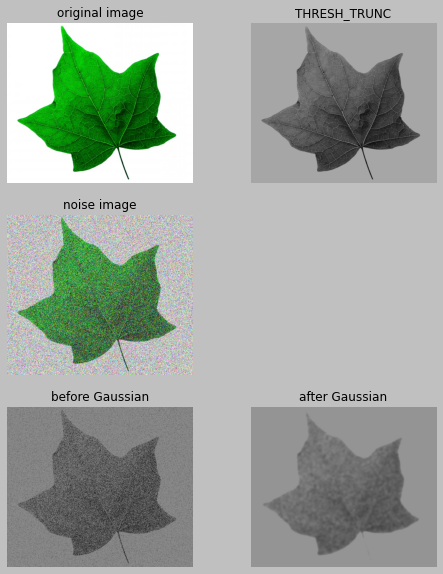

In [5]:
# THRESH_TRUNC
fig = plt.figure(figsize = (8, 10))
fig.patch.set_facecolor('silver')

ret, th = cv2.threshold(img_gray, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
ret2, th2 = cv2.threshold(noise_img_gray, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
ret3, th3 = cv2.threshold(blurred_img_gray, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)

show_with_matplotlib(img, 'original image', 1)
show_with_matplotlib(noise_img, 'noise image', 3)
show_with_matplotlib(cv2.cvtColor(th, cv2.COLOR_GRAY2BGR), 'THRESH_TRUNC', 2)
show_with_matplotlib(cv2.cvtColor(th2, cv2.COLOR_GRAY2BGR), 'before Gaussian', 5)
show_with_matplotlib(cv2.cvtColor(th3, cv2.COLOR_GRAY2BGR), 'after Gaussian', 6)
plt.show()

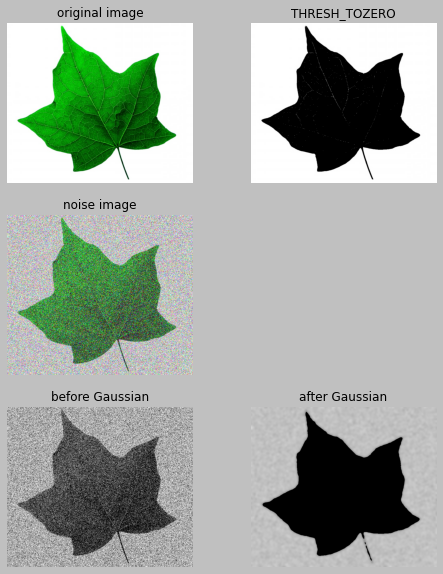

In [6]:
# THRESH_TOZERO
fig = plt.figure(figsize = (8, 10))
fig.patch.set_facecolor('silver')

ret, th = cv2.threshold(img_gray, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)
ret2, th2 = cv2.threshold(noise_img_gray, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)
ret3, th3 = cv2.threshold(blurred_img_gray, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)

show_with_matplotlib(img, 'original image', 1)
show_with_matplotlib(noise_img, 'noise image', 3)
show_with_matplotlib(cv2.cvtColor(th, cv2.COLOR_GRAY2BGR), 'THRESH_TOZERO', 2)
show_with_matplotlib(cv2.cvtColor(th2, cv2.COLOR_GRAY2BGR), 'before Gaussian', 5)
show_with_matplotlib(cv2.cvtColor(th3, cv2.COLOR_GRAY2BGR), 'after Gaussian', 6)
plt.show()

### - 결과 정리
BINARY와 TOZERO 방식으로 필터링 한 경우 원본 이미지를 검은색과 흰색으로만 구분했다. 그래서 잎의 줄기와 같은 세밀한 부분을 관측하기 힘든 반면 TRUNC 방식으로 필터링 한 경우에는 원본 이미지의 특성이 잘 반영되었다.

신기하게도 가우시안 필터링을 적용한 후에는 TRUNC 이미지가 굉장히 흐려졌다. BINARY 이미지는 원본 이미지를 필터링 했을 때와 거의 차이가 없지만 TOZERO 이미지는 배경 부분에 노이즈가 생긴 것을 확인할 수 있었다.

### 문제 2 
위의 노이즈가 있는 영상에 가우시안 필터링을 사용하는 경우, otsu's binarization 과 triangle ninarization 방법론의 성능의 소요 시간을 측정하고, 간단하게 결과를 정리하시오. 시간을 분석할 때는, 필터링 시간은 따로 측정하여, 순수하게 각 방법론에 걸린 시간, 총 시간을 연계하여 분석하시오. 

Gaussian filter : 0.007656

==================== THRESH_BINARY ====================
Otsu's binarization : 0.000669
Triangle binarization : 0.000623


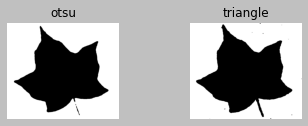


==================== THRESH_TRUNC ====================
Otsu's binarization : 0.002383
Triangle binarization : 0.001811


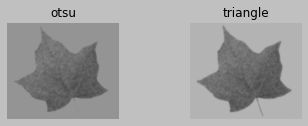


==================== THRESH_TOZERO ====================
Otsu's binarization : 0.001297
Triangle binarization : 0.000818


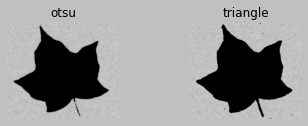


==================== TOTAL ====================
BINARY OTSU : 0.008325
BINARY TRIANGLE : 0.008279
TRUNC OTSU : 0.010039
TRUNC TRIANGLE : 0.009467
TOZERO OTSU : 0.008953
TOZERO TRIANGLE : 0.008474


In [12]:
img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noise_img = cv2.imread(image_path_noised)
noise_img_gray = cv2.cvtColor(noise_img, cv2.COLOR_BGR2GRAY)
blurred_img_gray = cv2.GaussianBlur(noise_img_gray, (25, 25), 0)

start = time.time()
blurred_img_gray = cv2.GaussianBlur(noise_img_gray, (25, 25), 0)
end = time.time()
gaussian = round(end - start, 6)
print("Gaussian filter :", gaussian)

print("\n==================== THRESH_BINARY ====================")
start = time.time()
ret, th = cv2.threshold(blurred_img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
end = time.time()
binary_otsu = round(end - start, 6)
print("Otsu's binarization :", binary_otsu)
start = time.time()
ret2, th2 = cv2.threshold(blurred_img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)
end = time.time()
binary_triangle = round(end - start, 6)
print("Triangle binarization :", binary_triangle)

fig = plt.figure(figsize=(6, 6))
fig.patch.set_facecolor('silver')
show_with_matplotlib(cv2.cvtColor(th, cv2.COLOR_GRAY2BGR), 'otsu', 1)
show_with_matplotlib(cv2.cvtColor(th2, cv2.COLOR_GRAY2BGR), 'triangle', 2)
plt.show()

print("\n==================== THRESH_TRUNC ====================")
start = time.time()
ret, th = cv2.threshold(blurred_img_gray, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
end = time.time()
trunc_otsu = round(end - start, 6)
print("Otsu's binarization :", trunc_otsu)
start = time.time()
ret2, th2 = cv2.threshold(blurred_img_gray, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_TRIANGLE)
end = time.time()
trunc_triangle = round(end - start, 6)
print("Triangle binarization :", trunc_triangle)

fig = plt.figure(figsize=(6, 6))
fig.patch.set_facecolor('silver')
show_with_matplotlib(cv2.cvtColor(th, cv2.COLOR_GRAY2BGR), 'otsu', 1)
show_with_matplotlib(cv2.cvtColor(th2, cv2.COLOR_GRAY2BGR), 'triangle', 2)
plt.show()

print("\n==================== THRESH_TOZERO ====================")
start = time.time()
ret, th = cv2.threshold(blurred_img_gray, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)
end = time.time()
tozero_otsu = round(end - start, 6)
print("Otsu's binarization :", tozero_otsu)
start = time.time()
ret2, th2 = cv2.threshold(blurred_img_gray, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_TRIANGLE)
end = time.time()
tozero_triangle = round(end - start, 6)
print("Triangle binarization :", tozero_triangle)

fig = plt.figure(figsize=(6, 6))
fig.patch.set_facecolor('silver')
show_with_matplotlib(cv2.cvtColor(th, cv2.COLOR_GRAY2BGR), 'otsu', 1)
show_with_matplotlib(cv2.cvtColor(th2, cv2.COLOR_GRAY2BGR), 'triangle', 2)
plt.show()

print("\n==================== TOTAL ====================")
print("BINARY OTSU :", round(gaussian + binary_otsu, 6))
print("BINARY TRIANGLE :", round(gaussian + binary_triangle, 6))
print("TRUNC OTSU :", round(gaussian + trunc_otsu, 6))
print("TRUNC TRIANGLE :", round(gaussian + trunc_triangle, 6))
print("TOZERO OTSU :", round(gaussian + tozero_otsu, 6))
print("TOZERO TRIANGLE :", round(gaussian + tozero_triangle, 6))

### - 결과 정리

결과값으로 바로 알 수 있는 점은 Triangle binarization 방식이 Otsu 방식보다 실행 시간이 짧다는 점이다. 임계처리 방식별로 분석해보면 TRUNC 방식의 실행 시간이 가장 길었다. BINARY와 TOZERO는 비슷한 것을 알 수 있다.

가우시안 필터링까지 적용하여 본 전체 소요 시간 순서는 아래처럼 BINARY에 triangle binarization을 적용한 것이 가장 짧았다.


BINARY + TRIANGLE < BINARY + OTSU < TOZERO + TRIANGLE < TOZERO + OTSU < TRUNC + TRIANGLE < TRUNC + OTSU